In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
import math
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.


In [14]:
#loading dataset
df=pd.read_csv("Data.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-10-03,41.299999,41.685001,39.400002,40.525002,29.296358,185090.0
1,2008-10-06,39.700001,40.799999,37.200001,39.564999,28.602345,204340.0
2,2008-10-07,40.000000,40.599998,36.000000,36.119999,26.111885,128970.0
3,2008-10-08,35.000000,44.400002,34.500000,40.880001,29.552996,700490.0
4,2008-10-10,40.400002,40.400002,35.299999,37.910000,27.405914,367380.0
...,...,...,...,...,...,...,...
2462,2018-09-25,218.000000,221.000000,208.500000,218.550003,218.550003,5014613.0
2463,2018-09-26,221.500000,221.500000,210.100006,212.149994,212.149994,3303414.0
2464,2018-09-27,213.199997,214.449997,185.199997,189.399994,189.399994,9492583.0
2465,2018-09-28,191.399994,198.850006,181.000000,189.500000,189.500000,6458894.0


In [15]:
#splitting date into year, month and day
date_split = df['Date'].str.split('-').str
df['Year'], df['Month'], df['Day'] = date_split
df["Volume"] = df["Volume"] / 10000
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  


,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,2008-10-03,41.299999,41.685001,39.400002,40.525002,29.296358,18.5090,2008,10,03
1,2008-10-06,39.700001,40.799999,37.200001,39.564999,28.602345,20.4340,2008,10,06
2,2008-10-07,40.000000,40.599998,36.000000,36.119999,26.111885,12.8970,2008,10,07
3,2008-10-08,35.000000,44.400002,34.500000,40.880001,29.552996,70.0490,2008,10,08
4,2008-10-10,40.400002,40.400002,35.299999,37.910000,27.405914,36.7380,2008,10,10
...,...,...,...,...,...,...,...,...,...,...
2462,2018-09-25,218.000000,221.000000,208.500000,218.550003,218.550003,501.4613,2018,09,25
2463,2018-09-26,221.500000,221.500000,210.100006,212.149994,212.149994,330.3414,2018,09,26
2464,2018-09-27,213.199997,214.449997,185.199997,189.399994,189.399994,949.2583,2018,09,27
2465,2018-09-28,191.399994,198.850006,181.000000,189.500000,189.500000,645.8894,2018,09,28


In [16]:
#dropping the columns that are not required
df.drop(df.columns[[0,3,5, 7,8,9]], axis=1, inplace=True)
df.head()

,Open,High,Close,Volume
0,41.299999,41.685001,40.525002,18.509
1,39.700001,40.799999,39.564999,20.434
2,40.000000,40.599998,36.119999,12.897
3,35.000000,44.400002,40.880001,70.049
4,40.400002,40.400002,37.910000,36.738


In [17]:
#normalizing and removing the null data points
df['Open'] = df['Open']/100
df['High'] = df['High']/100
df['Volume'] = df['Volume']*100
df['Close'] = df['Close']/100
df

,Open,High,Close,Volume
0,0.413,0.41685,0.40525,1850.90
1,0.397,0.40800,0.39565,2043.40
2,0.400,0.40600,0.36120,1289.70
3,0.350,0.44400,0.40880,7004.90
4,0.404,0.40400,0.37910,3673.80
...,...,...,...,...
2462,2.180,2.21000,2.18550,50146.13
2463,2.215,2.21500,2.12150,33034.14
2464,2.132,2.14450,1.89400,94925.83
2465,1.914,1.98850,1.89500,64588.94


In [19]:
nan_value_index = []
High = df.High.isnull()
for i in range(0, len(High)):
    if High[i] == 1:
        nan_value_index.append(i)
        df['High'][i] = 0
Open = df.Open.isnull()
for i in range(0, len(Open)):
    if Open[i] == 1:
        nan_value_index.append(i)
        df['Open'][i] = 0
Volume = df.Volume.isnull()
for i in range(0, len(Volume)):
    if Volume[i] == 1:
        nan_value_index.append(i)
        df['Volume'][i] = 0
Close = df.Close.isnull()
for i in range(0, len(Close)):
    if Close[i] == 1:
        nan_value_index.append(i)
        df['Close'][i] = 0
df

,Open,High,Close,Volume
0,0.413,0.41685,0.40525,1850.90
1,0.397,0.40800,0.39565,2043.40
2,0.400,0.40600,0.36120,1289.70
3,0.350,0.44400,0.40880,7004.90
4,0.404,0.40400,0.37910,3673.80
...,...,...,...,...
2462,2.180,2.21000,2.18550,50146.13
2463,2.215,2.21500,2.12150,33034.14
2464,2.132,2.14450,1.89400,94925.83
2465,1.914,1.98850,1.89500,64588.94


In [21]:
#splitting into training and testing dataset
X = df[['High','Open', 'Volume']]
Y = df[['Close']]
factor = 0.80
length = X.shape[0]
total_for_train = int(length*factor)
X_train = X[:total_for_train]
Y_train = Y[:total_for_train]
X_test = X[total_for_train:]
Y_test = Y[total_for_train:]

print("X_train", X_train.shape)
print("y_train", Y_train.shape)
print("X_test", X_test.shape)
print("y_test", Y_test.shape)

X_train (1973, 3)
y_train (1973, 1)
X_test (494, 3)
y_test (494, 1)


In [22]:
#Compiling and training the artificial neural network model
classifier = Sequential()
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 3))
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'linear'))
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = [])
classifier.fit(X_train, Y_train, batch_size = 128, epochs = 10, validation_split=0.05)

Epoch 1/10
15/15 [==============================] - 1s 16ms/step - loss: 1.4122 - val_loss: 1.8192
Epoch 2/10
15/15 [==============================] - 0s 4ms/step - loss: 0.3042 - val_loss: 0.4224
Epoch 3/10
15/15 [==============================] - 0s 4ms/step - loss: 0.1322 - val_loss: 0.5199
Epoch 4/10
15/15 [==============================] - 0s 4ms/step - loss: 0.1286 - val_loss: 0.6305
Epoch 5/10
15/15 [==============================] - 0s 3ms/step - loss: 0.1316 - val_loss: 0.5432
Epoch 6/10
15/15 [==============================] - 0s 4ms/step - loss: 0.1219 - val_loss: 0.3008
Epoch 7/10
15/15 [==============================] - 0s 4ms/step - loss: 0.1283 - val_loss: 0.7524
Epoch 8/10
15/15 [==============================] - 0s 4ms/step - loss: 0.1316 - val_loss: 0.7803
Epoch 9/10
15/15 [==============================] - 0s 4ms/step - loss: 0.1287 - val_loss: 0.2887
Epoch 10/10
15/15 [==============================] - 0s 3ms/step - loss: 0.0923 - val_loss: 0.5071


In [23]:
#predicted values
predictions = classifier.predict(X_test)
print(predictions[:10])


[[0.17448157]
 [0.17213355]
 [0.16244425]
 [0.20551015]
 [0.15004826]
 [0.18400401]
 [0.1622108 ]
 [0.17628084]
 [0.15577403]
 [0.35002884]]


In [24]:
#Calculating the error in the trained Neural Network model
trainScore = classifier.evaluate(X_train, Y_train, verbose=0)
print('train ccore: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = classifier.evaluate(X_test, Y_test, verbose=0)
print('test score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.11 MSE (0.33 RMSE)
Test Score: 4.42 MSE (2.10 RMSE)


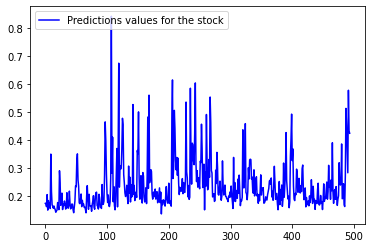

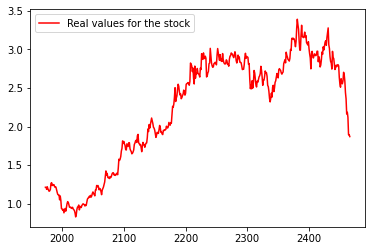

In [26]:
import matplotlib.pyplot as plt
plt.plot(predictions,color='blue', label='Predictions values for the stock')
plt.legend(loc='upper left')
plt.show()
plt.plot(Y_test,color='red', label='Real values for the stock')
plt.legend(loc='upper left')
plt.show()